In [97]:
import ROOT as R

In [98]:
R.EnableImplicitMT()

In [99]:
norm_path = '/data/pubfs/zhanglic/workspace/MLinHEP/VHHAnalysis/C2V_Training/Application_Samples/'

In [100]:
sample_list = ['Data','TT','TTBB','DY','Other']
signal_list = ['ZHHTo4B_CV_0_5_C2V_1_0_C3_1_0','ZHHTo4B_CV_1_0_C2V_0_0_C3_1_0','ZHHTo4B_CV_1_0_C2V_1_0_C3_0_0',\
               'ZHHTo4B_CV_1_0_C2V_1_0_C3_1_0','ZHHTo4B_CV_1_0_C2V_1_0_C3_2_0','ZHHTo4B_CV_1_0_C2V_2_0_C3_1_0',\
               'ZHHTo4B_CV_1_5_C2V_1_0_C3_1_0','ZHHTo4B_CV_1_0_C2V_1_0_C3_20_0', 'ZHHTo4B_CV_1_0_C2V_10_0_C3_1_0']
all_list = sample_list+signal_list
rdf_dict = {}
histo_dict = {}

In [101]:
for _sample in all_list:
#     rdf_dict[_sample+'_SB_2b'] = R.RDataFrame('Events',norm_path+'/'+_sample+'_Zll_rHH_SB_two_btag.root')
#     rdf_dict[_sample+'_SB_3b'] = R.RDataFrame('Events',norm_path+'/'+_sample+'_Zll_rHH_SB_three_btag.root')
#     rdf_dict[_sample+'_SB_4b'] = R.RDataFrame('Events',norm_path+'/'+_sample+'_Zll_rHH_SB_four_btag.root')
    rdf_dict[_sample+'_CR_2b'] = R.RDataFrame('Events',norm_path+'/'+_sample+'_Zll_rHH_CR_two_btag.root')
    rdf_dict[_sample+'_CR_3b'] = R.RDataFrame('Events',norm_path+'/'+_sample+'_Zll_rHH_CR_three_btag.root')
    rdf_dict[_sample+'_CR_4b'] = R.RDataFrame('Events',norm_path+'/'+_sample+'_Zll_rHH_CR_four_btag.root')
    rdf_dict[_sample+'_SR_2b'] = R.RDataFrame('Events',norm_path+'/'+_sample+'_Zll_rHH_SR_two_btag.root')
    rdf_dict[_sample+'_SR_3b'] = R.RDataFrame('Events',norm_path+'/'+_sample+'_Zll_rHH_SR_three_btag.root')
    rdf_dict[_sample+'_SR_4b'] = R.RDataFrame('Events',norm_path+'/'+_sample+'_Zll_rHH_SR_four_btag.root')
#END

In [102]:
f_hist_out_Z = R.TFile('Histo_for_XGB_C2V_BDT.root' ,'RECREATE')

In [103]:
for _sample in all_list:
    model = R.RDF.TH1DModel(_sample+'_CR_2b_Z_var'+'_xgb_c2v_bdt_score','xgb_c2v_bdt_score', 20, 0, 1)
    histo_dict[_sample+'_CR_2b_Z_var'] = rdf_dict[_sample+'_CR_2b'].Filter('isZee||isZmm')\
    .Filter('V_mass>75 && V_mass<105')\
    .Histo1D(model,'xgb_c2v_bdt_score','weight')
    
    model = R.RDF.TH1DModel(_sample+'_CR_3b_Z_var'+'_xgb_c2v_bdt_score','xgb_c2v_bdt_score', 20, 0, 1)
    histo_dict[_sample+'_CR_3b_Z_var'] = rdf_dict[_sample+'_CR_3b'].Filter('isZee||isZmm')\
    .Filter('V_mass>75 && V_mass<105')\
    .Histo1D(model,'xgb_c2v_bdt_score','weight')
    
    model = R.RDF.TH1DModel(_sample+'_CR_4b_Z_var'+'_xgb_c2v_bdt_score','xgb_c2v_bdt_score', 20, 0, 1)
    histo_dict[_sample+'_CR_4b_Z_var'] = rdf_dict[_sample+'_CR_4b'].Filter('isZee||isZmm')\
    .Filter('V_mass>75 && V_mass<105')\
    .Histo1D(model,'xgb_c2v_bdt_score','weight')
    
    histo_dict[_sample+'_CR_2b_Z_var'].Write()
    histo_dict[_sample+'_CR_3b_Z_var'].Write()
    histo_dict[_sample+'_CR_4b_Z_var'].Write()
    
    model = R.RDF.TH1DModel(_sample+'_SR_2b_Z_var'+'_xgb_c2v_bdt_score','xgb_c2v_bdt_score', 20, 0, 1)
    histo_dict[_sample+'_SR_2b_Z_var'] = rdf_dict[_sample+'_SR_2b'].Filter('isZee||isZmm')\
    .Filter('V_mass>75 && V_mass<105')\
    .Histo1D(model,'xgb_c2v_bdt_score','weight')
    
    model = R.RDF.TH1DModel(_sample+'_SR_3b_Z_var'+'_xgb_c2v_bdt_score','xgb_c2v_bdt_score', 20, 0, 1)
    histo_dict[_sample+'_SR_3b_Z_var'] = rdf_dict[_sample+'_SR_3b'].Filter('isZee||isZmm')\
    .Filter('V_mass>75 && V_mass<105')\
    .Histo1D(model,'xgb_c2v_bdt_score','weight')
    
    model = R.RDF.TH1DModel(_sample+'_SR_4b_Z_var'+'_xgb_c2v_bdt_score','xgb_c2v_bdt_score', 20, 0, 1)
    histo_dict[_sample+'_SR_4b_Z_var'] = rdf_dict[_sample+'_SR_4b'].Filter('isZee||isZmm')\
    .Filter('V_mass>75 && V_mass<105')\
    .Filter('weight<10')\
    .Histo1D(model,'xgb_c2v_bdt_score','weight')
    
    histo_dict[_sample+'_SR_2b_Z_var'].Write()
    histo_dict[_sample+'_SR_3b_Z_var'].Write()
    histo_dict[_sample+'_SR_4b_Z_var'].Write()
#END

In [104]:
for _sample in all_list:
    model = R.RDF.TH1DModel(_sample+'_CR_2b_Z_var'+'_CMS_vhh_bdt_c2v_13TeV','CMS_vhh_bdt_c2v_13TeV', 20, -1, 1)
    histo_dict[_sample+'_CR_2b_Z_var'] = rdf_dict[_sample+'_CR_2b'].Filter('isZee||isZmm')\
    .Filter('V_mass>75 && V_mass<105')\
    .Histo1D(model,'CMS_vhh_bdt_c2v_13TeV','weight')
    
    model = R.RDF.TH1DModel(_sample+'_CR_3b_Z_var'+'_CMS_vhh_bdt_c2v_13TeV','CMS_vhh_bdt_c2v_13TeV', 20, -1, 1)
    histo_dict[_sample+'_CR_3b_Z_var'] = rdf_dict[_sample+'_CR_3b'].Filter('isZee||isZmm')\
    .Filter('V_mass>75 && V_mass<105')\
    .Histo1D(model,'CMS_vhh_bdt_c2v_13TeV','weight')
    
    model = R.RDF.TH1DModel(_sample+'_CR_4b_Z_var'+'_CMS_vhh_bdt_c2v_13TeV','CMS_vhh_bdt_c2v_13TeV', 20, -1, 1)
    histo_dict[_sample+'_CR_4b_Z_var'] = rdf_dict[_sample+'_CR_4b'].Filter('isZee||isZmm')\
    .Filter('V_mass>75 && V_mass<105')\
    .Histo1D(model,'CMS_vhh_bdt_c2v_13TeV','weight')
    
    histo_dict[_sample+'_CR_2b_Z_var'].Write()
    histo_dict[_sample+'_CR_3b_Z_var'].Write()
    histo_dict[_sample+'_CR_4b_Z_var'].Write()
    
    model = R.RDF.TH1DModel(_sample+'_SR_2b_Z_var'+'_CMS_vhh_bdt_c2v_13TeV','CMS_vhh_bdt_c2v_13TeV', 20, -1, 1)
    histo_dict[_sample+'_SR_2b_Z_var'] = rdf_dict[_sample+'_SR_2b'].Filter('isZee||isZmm')\
    .Filter('V_mass>75 && V_mass<105')\
    .Histo1D(model,'CMS_vhh_bdt_c2v_13TeV','weight')
    
    model = R.RDF.TH1DModel(_sample+'_SR_3b_Z_var'+'_CMS_vhh_bdt_c2v_13TeV','CMS_vhh_bdt_c2v_13TeV', 20, -1, 1)
    histo_dict[_sample+'_SR_3b_Z_var'] = rdf_dict[_sample+'_SR_3b'].Filter('isZee||isZmm')\
    .Filter('V_mass>75 && V_mass<105')\
    .Histo1D(model,'CMS_vhh_bdt_c2v_13TeV','weight')
    
    model = R.RDF.TH1DModel(_sample+'_SR_4b_Z_var'+'_CMS_vhh_bdt_c2v_13TeV','CMS_vhh_bdt_c2v_13TeV', 20, -1, 1)
    histo_dict[_sample+'_SR_4b_Z_var'] = rdf_dict[_sample+'_SR_4b'].Filter('isZee||isZmm')\
    .Filter('V_mass>75 && V_mass<105')\
    .Filter('weight<10')\
    .Histo1D(model,'CMS_vhh_bdt_c2v_13TeV','weight')
    
    histo_dict[_sample+'_SR_2b_Z_var'].Write()
    histo_dict[_sample+'_SR_3b_Z_var'].Write()
    histo_dict[_sample+'_SR_4b_Z_var'].Write()
#END

In [105]:
f_hist_out_Z.Close()

In [106]:
f_hist_in_Z = R.TFile('Histo_for_XGB_C2V_BDT.root','READ')

In [107]:
histo_dict  = {}
keys = f_hist_in_Z.GetListOfKeys()
for key in keys:
    histo_dict[key.ReadObj().GetName()] = f_hist_in_Z.Get(key.ReadObj().GetName())
#     print(key.ReadObj().GetName())

In [108]:
hs = R.THStack("stack","xgb_c2v_bdt_score")

hs.Add(histo_dict['Other_SR_4b_Z_var_xgb_c2v_bdt_score'])
histo_dict['Other_SR_4b_Z_var_xgb_c2v_bdt_score'].SetFillColor(800)

hs.Add(histo_dict['TTBB_SR_4b_Z_var_xgb_c2v_bdt_score'])
histo_dict['TTBB_SR_4b_Z_var_xgb_c2v_bdt_score'].SetFillColor(432)

hs.Add(histo_dict['TT_SR_4b_Z_var_xgb_c2v_bdt_score'])
histo_dict['TT_SR_4b_Z_var_xgb_c2v_bdt_score'].SetFillColor(600)

hs.Add(histo_dict['DY_SR_4b_Z_var_xgb_c2v_bdt_score'])
histo_dict['DY_SR_4b_Z_var_xgb_c2v_bdt_score'].SetFillColor(400)

histo_dict['Data_SR_4b_Z_var_xgb_c2v_bdt_score'].SetMarkerSize()
histo_dict['Data_SR_4b_Z_var_xgb_c2v_bdt_score'].SetMarkerStyle(20)
histo_dict['Data_SR_4b_Z_var_xgb_c2v_bdt_score'].Sumw2()

In [109]:
histo_dict['ZHHTo4B_CV_1_0_C2V_1_0_C3_1_0_SR_4b_Z_var_xgb_c2v_bdt_score'].SetLineColor(632)
histo_dict['ZHHTo4B_CV_1_0_C2V_10_0_C3_1_0_SR_4b_Z_var_xgb_c2v_bdt_score'].SetLineColor(416)
histo_dict['ZHHTo4B_CV_1_0_C2V_1_0_C3_1_0_SR_4b_Z_var_xgb_c2v_bdt_score'].SetLineWidth(2)
histo_dict['ZHHTo4B_CV_1_0_C2V_10_0_C3_1_0_SR_4b_Z_var_xgb_c2v_bdt_score'].SetLineWidth(2)

histo_dict['ZHHTo4B_CV_1_0_C2V_1_0_C3_1_0_SR_4b_Z_var_CMS_vhh_bdt_c2v_13TeV'].SetLineColor(632)
histo_dict['ZHHTo4B_CV_1_0_C2V_10_0_C3_1_0_SR_4b_Z_var_CMS_vhh_bdt_c2v_13TeV'].SetLineColor(416)
histo_dict['ZHHTo4B_CV_1_0_C2V_1_0_C3_1_0_SR_4b_Z_var_CMS_vhh_bdt_c2v_13TeV'].SetLineWidth(2)
histo_dict['ZHHTo4B_CV_1_0_C2V_10_0_C3_1_0_SR_4b_Z_var_CMS_vhh_bdt_c2v_13TeV'].SetLineWidth(2)

In [110]:
histo_dict['ZHHTo4B_CV_1_0_C2V_1_0_C3_1_0_SR_4b_Z_var_xgb_c2v_bdt_score'].Scale(4000)
histo_dict['ZHHTo4B_CV_1_0_C2V_10_0_C3_1_0_SR_4b_Z_var_xgb_c2v_bdt_score'].Scale(20)

histo_dict['ZHHTo4B_CV_1_0_C2V_1_0_C3_1_0_SR_4b_Z_var_CMS_vhh_bdt_c2v_13TeV'].Scale(4000)
histo_dict['ZHHTo4B_CV_1_0_C2V_10_0_C3_1_0_SR_4b_Z_var_CMS_vhh_bdt_c2v_13TeV'].Scale(20)

Info in <TCanvas::Print>: png file temp.png has been created


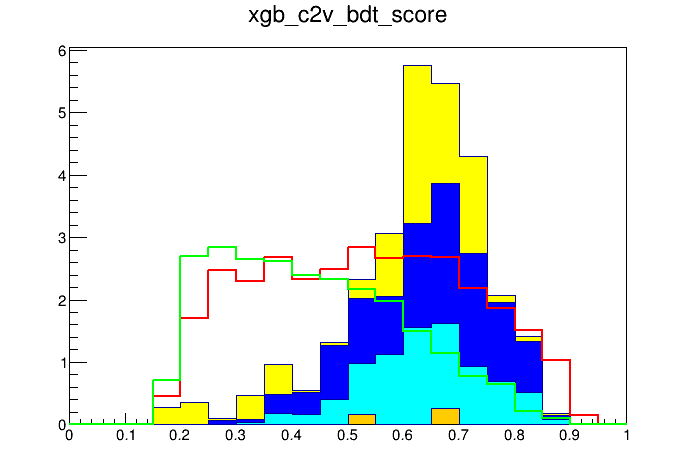

In [111]:
c = R.TCanvas()
R.gStyle.SetOptStat(0000)
hs.Draw('hist')
# histo_dict['Data_SR_4b_Z_var_xgb_c2v_bdt_score'].Draw('SAME')
hs.Draw('histSAME')
# histo_dict['Data_SR_4b_Z_var_xgb_c2v_bdt_score'].Draw('SAME')
histo_dict['ZHHTo4B_CV_1_0_C2V_1_0_C3_1_0_SR_4b_Z_var_xgb_c2v_bdt_score'].Draw("SAMEhist")
histo_dict['ZHHTo4B_CV_1_0_C2V_10_0_C3_1_0_SR_4b_Z_var_xgb_c2v_bdt_score'].Draw("SAMEhist")
c.Draw()
c.SaveAs('temp.png')

0.6555524424704506
0.45073997864891097


Info in <TCanvas::Print>: png file temp.png has been created


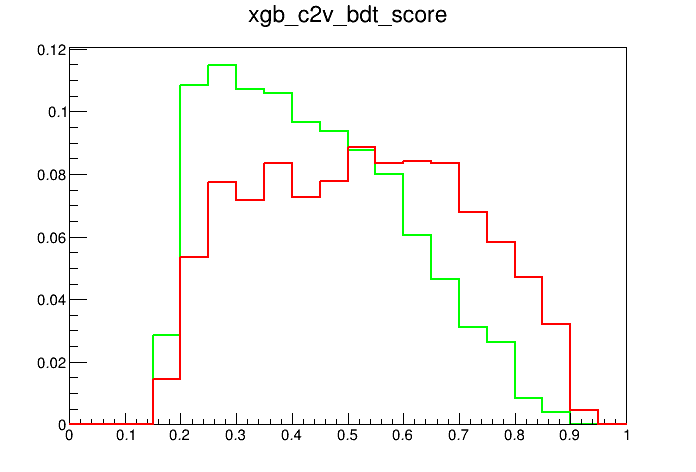

In [124]:
c = R.TCanvas()
R.gStyle.SetOptStat(0000)
histo_dict['ZHHTo4B_CV_1_0_C2V_10_0_C3_1_0_SR_4b_Z_var_xgb_c2v_bdt_score'].DrawNormalized("SAMEhist")
histo_dict['ZHHTo4B_CV_1_0_C2V_1_0_C3_1_0_SR_4b_Z_var_xgb_c2v_bdt_score'].DrawNormalized("SAMEhist")
c.Draw()
c.SaveAs('temp.png')
print(histo_dict['ZHHTo4B_CV_1_0_C2V_10_0_C3_1_0_SR_4b_Z_var_xgb_c2v_bdt_score'].Integral(1,10)/histo_dict['ZHHTo4B_CV_1_0_C2V_10_0_C3_1_0_SR_4b_Z_var_xgb_c2v_bdt_score'].Integral())
print(histo_dict['ZHHTo4B_CV_1_0_C2V_1_0_C3_1_0_SR_4b_Z_var_xgb_c2v_bdt_score'].Integral(1,10)/histo_dict['ZHHTo4B_CV_1_0_C2V_1_0_C3_1_0_SR_4b_Z_var_xgb_c2v_bdt_score'].Integral())


0.5407089970686132
0.3572142370266794


Info in <TCanvas::Print>: png file temp.png has been created


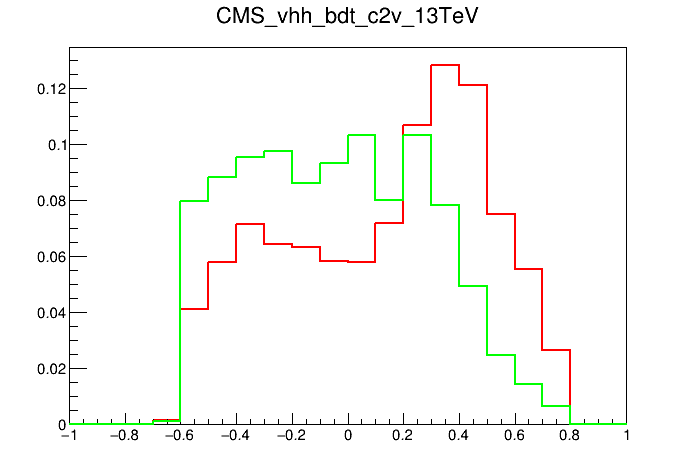

In [125]:
c = R.TCanvas()
R.gStyle.SetOptStat(0000)
histo_dict['ZHHTo4B_CV_1_0_C2V_1_0_C3_1_0_SR_4b_Z_var_CMS_vhh_bdt_c2v_13TeV'].DrawNormalized("SAMEhist")
histo_dict['ZHHTo4B_CV_1_0_C2V_10_0_C3_1_0_SR_4b_Z_var_CMS_vhh_bdt_c2v_13TeV'].DrawNormalized("SAMEhist")
c.Draw()
c.SaveAs('temp.png')
print(histo_dict['ZHHTo4B_CV_1_0_C2V_10_0_C3_1_0_SR_4b_Z_var_CMS_vhh_bdt_c2v_13TeV'].Integral(1,10)/histo_dict['ZHHTo4B_CV_1_0_C2V_10_0_C3_1_0_SR_4b_Z_var_CMS_vhh_bdt_c2v_13TeV'].Integral())
print(histo_dict['ZHHTo4B_CV_1_0_C2V_1_0_C3_1_0_SR_4b_Z_var_CMS_vhh_bdt_c2v_13TeV'].Integral(1,10)/histo_dict['ZHHTo4B_CV_1_0_C2V_1_0_C3_1_0_SR_4b_Z_var_CMS_vhh_bdt_c2v_13TeV'].Integral())
